<br><br>
<a id='Header' style="font-size:40px; color:#1D2951; text-decoration:none; text-align:center;">
    <center><b>Loan Data investigation</b></center>
</a>

<br><br>

<a id='Header' style="font-size:30px; color:#1D2951; text-decoration:none">
    <b> Table of Contents </b>
</a> 
<ul>
    <li><a href="#intro" style="font-size:18px; color:#1D2951">Introduction</a></li>
<!--     <li><a href="#dataset" style="font-size:18px; color:#1D2951">Dataset Overview</a></li> -->
    <li><a href="#eda" style="font-size:18px; color:#1D2951">Visualizations Part</a></li>
<!--     <li><a href="#bi" style="font-size:18px; color:#1D2951">Bivariate Visualizations</a></li>
    <li><a href="#multi" style="font-size:18px; color:#1D2951">Multivariate Visualizations</a></li> -->
    <li><a href="#conclusions" style="font-size:18px; color:#1D2951">Conclusions</a></li>

</ul>

<hr>

<a id='intro' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Introduction</b></a>

This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and borrower APR and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations.

<a id='dataset' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Dataset Overview</b></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Data
df = pd.read_csv("prosperLoanData.csv")
schema_df = pd.read_csv("Schema_Prosper Loan Data.csv", index_col = 'Variable')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Selecting Data Which I thought It's Affect on LoanStatus
df_selected = ['LoanStatus','Term', 'ProsperScore', 'IsBorrowerHomeowner','EmploymentStatus',
               'MonthlyLoanPayment', 'IncomeRange', 'BorrowerRate', 'LoanOriginalAmount','BorrowerAPR', 'LenderYield',
               'OpenCreditLines', 'ListingCreationDate', 'ProsperRating (Alpha)']
df = df[df_selected]
df.head()

,LoanStatus,Term,ProsperScore,IsBorrowerHomeowner,EmploymentStatus,MonthlyLoanPayment,IncomeRange,BorrowerRate,LoanOriginalAmount,BorrowerAPR,LenderYield,OpenCreditLines,ListingCreationDate,ProsperRating (Alpha)
0,Completed,36,NaN,True,Self-employed,330.43,"$25,000-49,999",0.1580,9425,0.16516,0.1380,4.0,2007-08-26 19:09:29.263000000,NaN
1,Current,36,7.0,False,Employed,318.93,"$50,000-74,999",0.0920,10000,0.12016,0.0820,14.0,2014-02-27 08:28:07.900000000,A
2,Completed,36,NaN,False,Not available,123.32,Not displayed,0.2750,3001,0.28269,0.2400,NaN,2007-01-05 15:00:47.090000000,NaN
3,Current,36,9.0,True,Employed,321.45,"$25,000-49,999",0.0974,10000,0.12528,0.0874,5.0,2012-10-22 11:02:35.010000000,A
4,Current,36,4.0,True,Employed,563.97,"$100,000+",0.2085,15000,0.24614,0.1985,19.0,2013-09-14 18:38:39.097000000,D


In [4]:
## This Function will helps me to draw following restult in good shape with showing the result of each term at above of bar chart.
def decorate_barPlots(ax, title='TITLE', hideAxes=True, direction='v', rotateTextdeg=0):
    '''
        ax : matplotlib.axes._subplots.AxesSubplot
        hideAxes : Hide right and top axes of the plot
        annotate : add numbers related to bar sizes
        direction : v or h which stands for vertical and horizontal
    '''

    if direction == 'v':
        for p in ax.patches:
            bar_length = round(p.get_height(), 4)
            ax.annotate(str(bar_length), xy=(p.get_x() + p.get_width() / 2.0, bar_length),
            xytext=(3, 3),
            textcoords='offset points',
            ha='center',
            va='bottom',
            rotation = rotateTextdeg
                       )
    elif direction == 'h':
        for p in ax.patches:
            bar_length = round(p.get_width(), 4)
            ax.annotate(str(bar_length), xy=(bar_length, p.get_y() + (p.get_height() / 2.0)),
            xytext=(25, 1),
            textcoords='offset points',
            ha='center', # Horizontal Alignment: 'center', 'right', 'left'
            va='center_baseline', # Vertical Alignment:'top', 'bottom', 'center', 'baseline', 'center_baseline'
            rotation = rotateTextdeg
                                )
    else:
        print('Not Annotated!')


    if hideAxes:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

    title_obj = ax.set_title(f'{title}', pad=20, fontsize=15)
    plt.setp(title_obj, color='#1D2951');

<a id='eda' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Visualizations Part</b></a>


**Let see Loan Status Distribution and how it's look like**

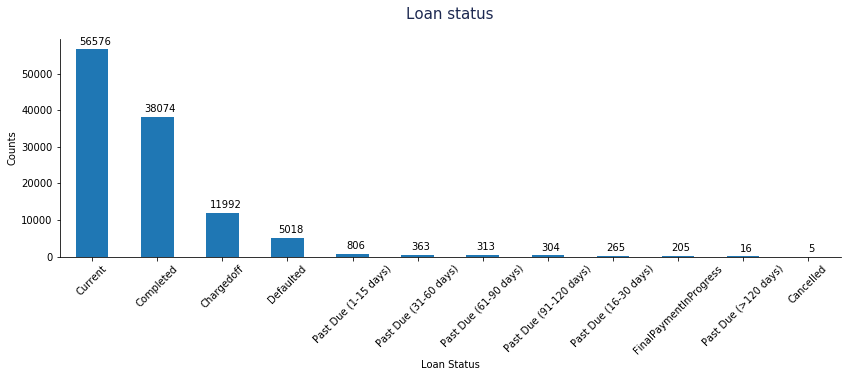

In [5]:
plt.figure(figsize=(14, 4))
ax = df['LoanStatus'].value_counts().sort_values(ascending = False).plot(kind='bar');
decorate_barPlots(ax, title='Loan status', direction='v', rotateTextdeg=0);
plt.xticks(rotation=45)
plt.xlabel('Loan Status')
plt.ylabel('Counts');

In [6]:
df['LoanStatus'] = df['LoanStatus'].replace(['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)',
                            'Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)'],'Past Due')
df['LoanStatus'] = df['LoanStatus'].replace('FinalPaymentInProgress', 'InProgress')

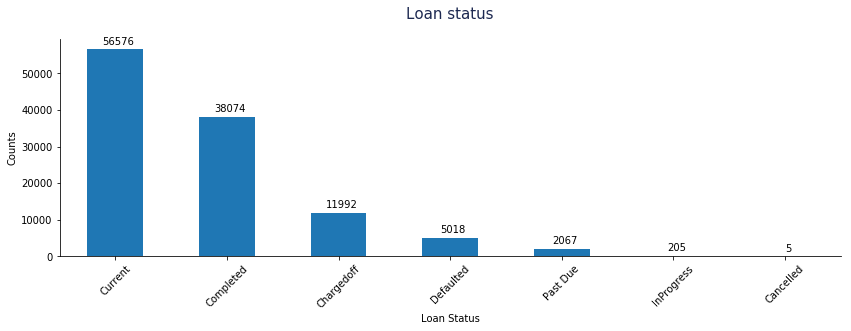

In [7]:
plt.figure(figsize=(14, 4))
ax = df['LoanStatus'].value_counts().sort_values(ascending = False).plot(kind='bar');
decorate_barPlots(ax, title='Loan status', direction='v', rotateTextdeg=0);
plt.xticks(rotation=45);
plt.xlabel('Loan Status')
plt.ylabel('Counts');

the plot shows that Current status has got the highest number of listings followed by Completed and Chargedoff. Other statuses include dues for various intervals and cancelled whose frequency is too less


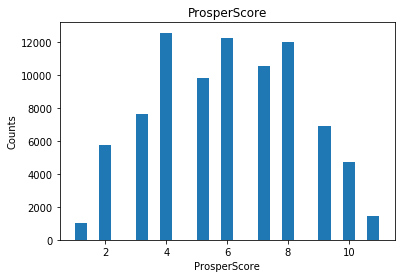

In [8]:
df['ProsperScore'].hist(grid = False, bins = 25)
plt.title('ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('Counts');

The Prosper Score should be between 1 - 10, As it shown in Graph there are numbers larger than 10 need to be cleaned

In [9]:
df['ProsperScore'] = df[df['ProsperScore'] <= 10]['ProsperScore']

**What do you think the most prosper scores?**

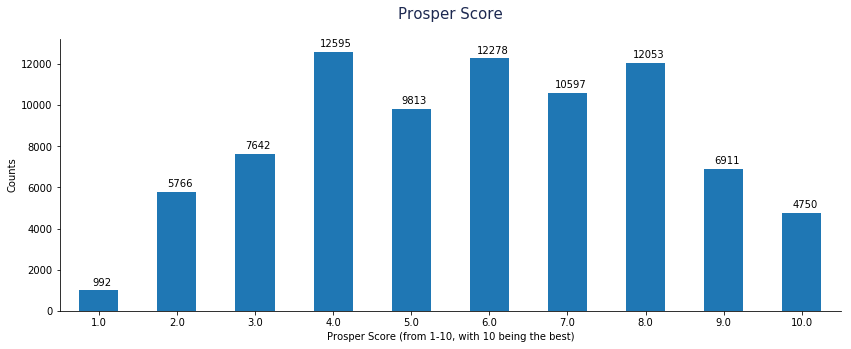

In [10]:
plt.figure(figsize=(14, 5))
ax = df['ProsperScore'].value_counts().sort_index().plot(kind='bar')
decorate_barPlots(ax, title='Prosper Score', direction='v', rotateTextdeg=0)
plt.xlabel('Prosper Score (from 1-10, with 10 being the best)')
plt.ylabel('Counts')
plt.xticks(rotation=0);

Most of the borrower have a fairly low Prosper Score of 4 (custom risk score) while the majority of the customer have a score between 5-8. You can also see that even customers with the low risks score of 1 or 2 did get a loan from Prosper.

**Let's see the income rate distribution to know the average income rate of listings.**

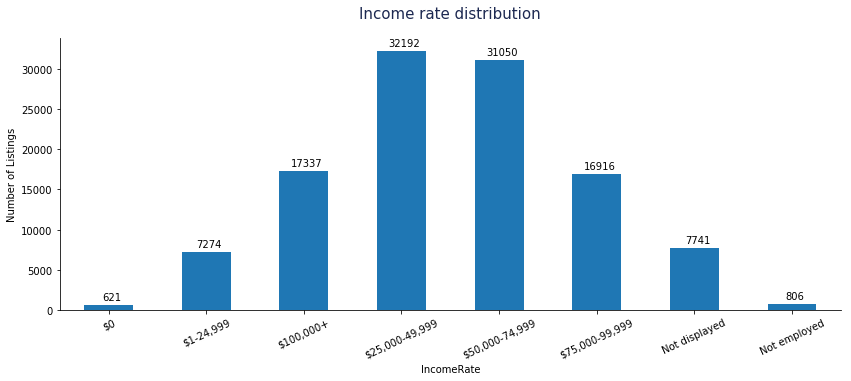

In [11]:
plt.figure(figsize=(14, 5))
IncomeRange_count = df.IncomeRange.value_counts().sort_index().plot(kind ='bar')
decorate_barPlots(IncomeRange_count, title = 'Income rate distribution', direction = 'v')
plt.xlabel('IncomeRate');
plt.ylabel('Number of Listings');
plt.xticks(rotation=25);

The figure says that most listings fall under 50000 dollars, followed by 50000-74999 dollars and so on. This also concludes that the more the income rate the less the listings count.

**Let's check the relation between Loans Status and Term**

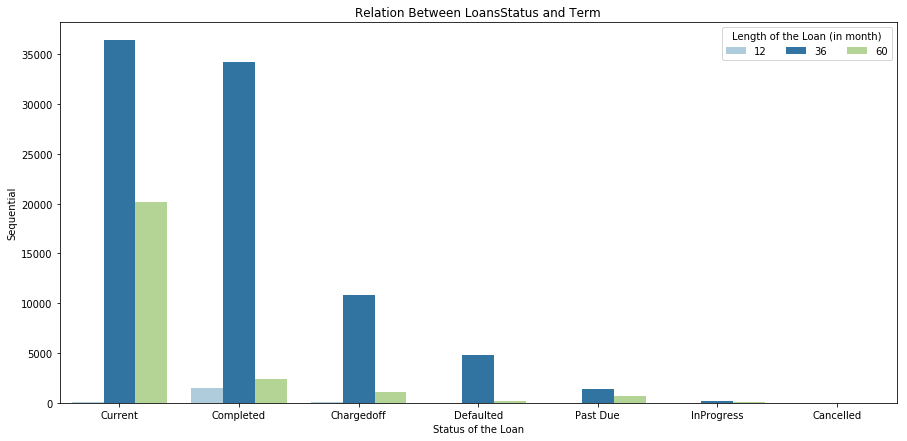

In [12]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data = df, x = 'LoanStatus', hue = 'Term', palette = "Paired", order = df['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.title('Relation Between LoansStatus and Term')
plt.xlabel('Status of the Loan')
plt.ylabel("Sequential");

The length of the loan seem not to have an impact on the outcome of the loan: no matter what status a loan has, the most common length is 36 month and least common is 60 month

**Let's see the relation between ProsperScore and LoanStatus**

In [13]:
ct_counts = df.groupby(['LoanStatus', 'ProsperScore']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'ProsperScore', columns = 'LoanStatus', values = 'count')

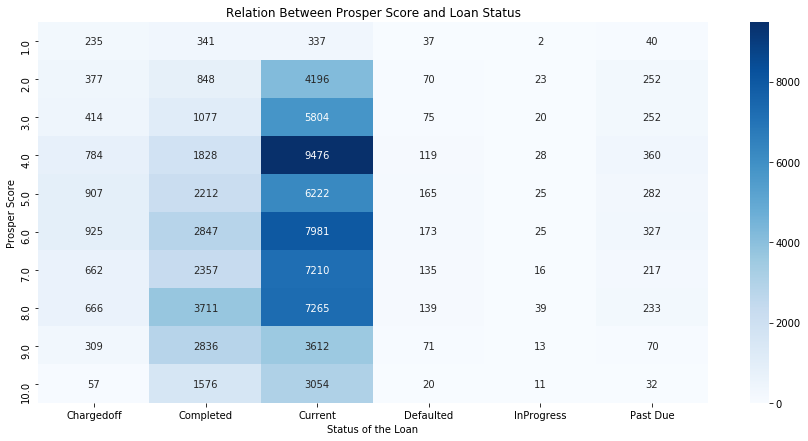

In [19]:
plt.figure(figsize = [15,7])
mask = ct_counts.isnull()
sns.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'Blues',mask = mask)
plt.xlabel('Status of the Loan')
plt.ylabel('Prosper Score')
plt.title('Relation Between Prosper Score and Loan Status');

The Prosper Score seem to affect the outcome of the loan: so have the most borrower an Prosper Score of 8 when a loan is completed, while most borrower with defaulted and charged-off loans have an Prosper Score of 6. Furthermore, the most comon Prosper Score for borrowers with loans that have past due payments is 4

**We can check if most brrowers over many years have their own home or they don't.**

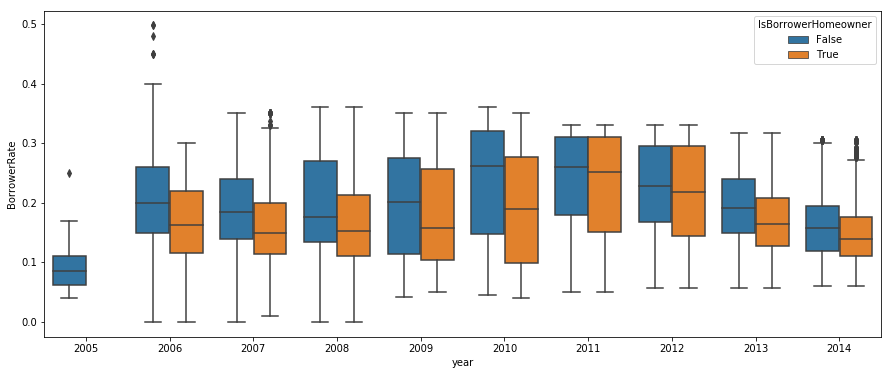

In [15]:
df['year'] = df['ListingCreationDate'].str.split('-').str[0]
g = sns.boxplot(data=df, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)

it's clearly appear that the number of borrowers of non-homeowners higher than the number of brrowers of homeowners

**The relation between Borrower APR & Lender Yield & ProsperScore**

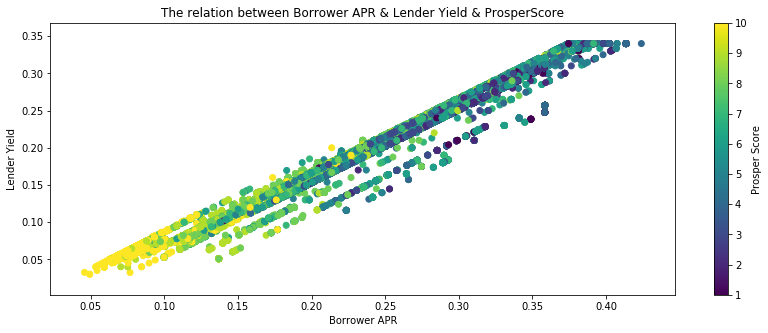

In [16]:
plt.figure(figsize=[14,5])
plt.scatter(data=df,x="BorrowerAPR",y = "LenderYield",c="ProsperScore")
plt.xlabel("Borrower APR")
plt.ylabel("Lender Yield");
plt.title("The relation between Borrower APR & Lender Yield & ProsperScore");
plt.colorbar(label="Prosper Score");

This graph shows that the loans with higher Borrower APR and Lender yield had a lower prosper score.

<a id='conclusions' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Conclusions</b></a>

At the end we have seen multi-factors which affect on Loan Status and number of loan cases like Prosper score and Term. <br>